In [93]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [94]:
import numpy as np
import pandas as pd

In [95]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [96]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [97]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [98]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [99]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [100]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [101]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [167]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

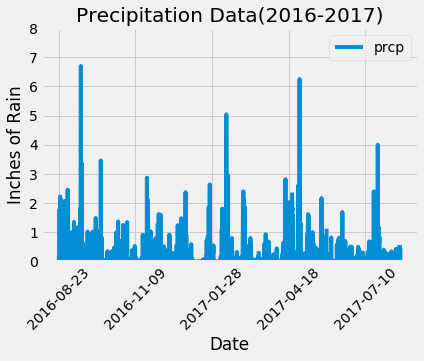

In [149]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = latest_date[0]

#Calculating the date 1 year ago from latest date
year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d")- dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query).set_index('date')

# Sort the dataframe by date
df.sort_values(by ='date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Data(2016-2017)")
plt.ylim(0,8)
plt.ylabel('Inches of Rain')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()



In [150]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [151]:
#inspecting the table to learn about the columns 
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [152]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.name).count()

9

In [165]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print(f'The most active station is station {most_active[0]} with {most_active[1]} measurements')

The most active station is station USC00519281 with 2772 measurements


In [166]:
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [183]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

highest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by((Measurement.tobs).desc()).first()
lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').order_by((Measurement.tobs).asc()).first()
avg_temp = session.query(func.avg(Measurement.tobs)).all()

print(f'The highest temperature recored is {highest_temp} , the lowest temperature recorded is {lowest_temp} , and the average is {avg_temp}')



The highest temperature recored is (85.0,) , the lowest temperature recorded is (54.0,) , and the average is [(73.09795396419437,)]


In [188]:
# Choose the station with the highest number of temperature observations.
most_observations = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
most_observations

print(f'The station with the most temperature observatoins is {most_observations[0]} with {most_observations[1]} total observations.')


The station with the most temperature observatoins is USC00519281 with 2772 total observations


Text(0.5, 0, 'Temperature')

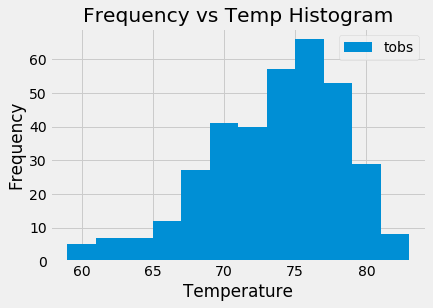

In [199]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(Measurement.tobs).filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').order_by(Measurement.date).all()
df = pd.DataFrame(query)
# Sort the dataframe by date
df.plot.hist(query,bins=12, title = "Frequency vs Temp Histogram")
plt.xlabel('Temperature')


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
